# TORCH数据增强工具 TRANSFORMS
将TRANSFORMS工具加到DATALODAER中

In [4]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [12]:
class MyData(Dataset):

    def __init__(self, root_dir, image_dir, label_dir, transform=None):
        self.root_dir = root_dir
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.label_path = os.path.join(self.root_dir, self.label_dir)
        self.image_path = os.path.join(self.root_dir, self.image_dir)
        self.image_list = os.listdir(self.image_path)
        self.label_list = os.listdir(self.label_path)
        self.transform = transform
        # 因为label 和 Image文件名相同，进行一样的排序，可以保证取出的数据和label是一一对应的
        self.image_list.sort()
        self.label_list.sort()

    def __getitem__(self, idx):
        img_name = self.image_list[idx]
        label_name = self.label_list[idx]
        img_item_path = os.path.join(self.root_dir, self.image_dir, img_name)
        label_item_path = os.path.join(self.root_dir, self.label_dir, label_name)
        img = Image.open(img_item_path)
        label = Image.open(label_item_path)
#         with open(label_item_path, 'r') as f:
#             label = f.readline()

        if self.transform:
            img = self.transform(img)


        return img, label
    
    def __len__(self):
        assert len(self.image_list) == len(self.label_list)
        return len(self.image_list)


In [21]:
transform_fn = []
# 无操作
transform_1 =transforms.Compose([transforms.ToTensor()])
# 缩放
transform_2 = transforms.Compose([transforms.Resize(400), transforms.ToTensor()])
#裁剪
transform_3 = transforms.Compose([transforms.CenterCrop(100), transforms.ToTensor()])
#反转
transform_4 = transforms.Compose([transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()])
#填充
transform_5 = transforms.Compose([transforms.Pad(padding=32, fill=(255, 0, 0), padding_mode='constant'), transforms.ToTensor()])
transform_fn = [transform_1,transform_2,transform_3,transform_4,transform_5]
root_dir = ".\\sea_ice"
image = "image"
label = "label"




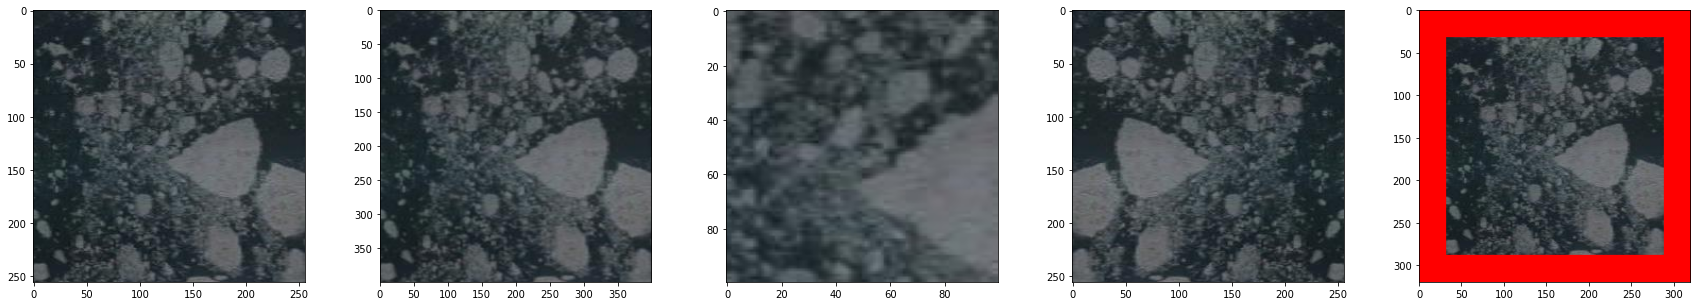

In [23]:
fig=plt.figure(figsize=(30,5))

for i in range(5):
    dataset = MyData(root_dir, image, label, transform=transform_fn[i])
    data,_ = dataset[3]
    plt.subplot(1,5,i+1)
    plt.imshow(Image.fromarray(np.uint8((data.permute(1,2,0))*255)))
plt.show()

# fig=plt.figure(figsize=(25,5))
# for i in range(4):
#     plt.subplot(1,4,i+1)
#     _,label = dataset[i]
#     plt.imshow(label,cmap="gray")
# plt.show()